<a href="https://colab.research.google.com/github/javohir-ergashboyev/ML-projects/blob/main/CustomerClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df=pd.read_csv('customer_segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
# prompt: drop Address column

df.drop(['Address'],axis=1,inplace=True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=df.values[:,1:]
X=np.nan_to_num(X)
X=scaler.fit_transform(X)
X

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [15]:
km=KMeans(init='random', n_clusters=4)
km.fit(X)
km.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 2, 1, 3, 0, 2, 3, 3, 3, 2, 1, 3, 3, 2, 1, 3, 3, 3, 2, 2, 3, 3,
       1, 2, 0, 2, 3, 2, 2, 3, 2, 2, 1, 3, 3, 3, 1, 1, 3, 2, 1, 0, 3, 0,
       2, 2, 3, 3, 3, 3, 2, 2, 1, 2, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 3, 3,
       2, 1, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 0, 2, 2, 0, 2, 3, 2, 3, 3, 3,
       1, 1, 2, 3, 1, 1, 3, 2, 3, 3, 1, 3, 1, 0, 2, 1, 1, 0, 3, 3, 3, 2,
       2, 3, 3, 1, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2,
       3, 3, 3, 3, 2, 3, 2, 1, 1, 3, 3, 3, 0, 3, 2, 1, 3, 3, 3, 2, 1, 3,
       3, 2, 2, 2, 1, 1, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 1, 3, 1,
       2, 3, 1, 2, 1, 3, 3, 0, 1, 1, 3, 3, 2, 2, 3, 2, 2, 1, 2, 3, 3, 2,
       0, 3, 2, 3, 1, 3, 3, 1, 3, 2, 2, 1, 3, 3, 3, 2, 3, 1, 1, 0, 2, 2,
       1, 2, 3, 3, 3, 3, 0, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 1, 2, 3, 3, 2,
       3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 1, 2, 1, 3, 3, 3, 3, 2, 1,
       2, 1, 3, 2, 3, 2, 1, 3, 3, 2, 3, 1, 1, 1, 3, 3, 3, 0, 2, 3, 2, 3,
       2, 3, 2, 2, 3, 2, 3, 1, 3, 3, 1, 3, 1, 2, 2,

In [16]:
df['cluster']=km.labels_
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,3
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,3
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [17]:
df.groupby('cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,,
0,443.407407,42.259259,2.222222,16.685185,126.796296,7.042704,12.264463,0.441860,18.468519
1,423.518293,31.835366,1.865854,3.957317,31.457317,1.598811,2.776146,0.993865,13.979878
2,398.603524,41.696035,1.568282,15.590308,67.709251,1.721379,3.609511,0.011429,8.933040
3,438.990123,31.622222,1.659259,5.412346,30.365432,0.758106,1.679084,0.000000,8.217531


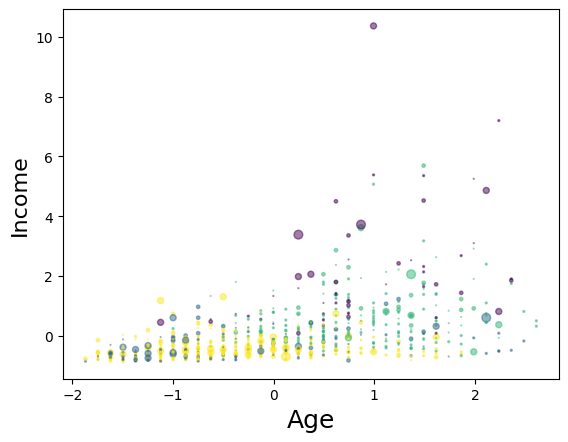

In [18]:
area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=km.labels_.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

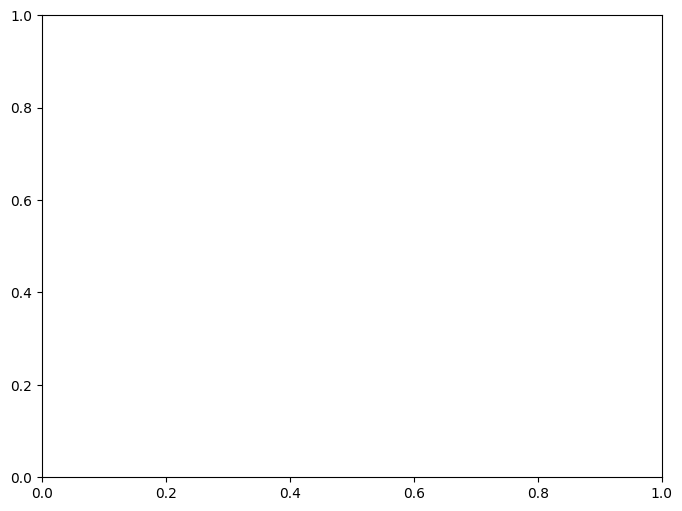

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=120)

plt.cla()
ax.set_xlabel('Years Employed')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 2], X[:, 0], X[:, 3], c= km.labels_.astype(float))
plt.show()